In [7]:
library(Seurat)
library(SCeQTL)
library(ggplot2)

In [8]:
gene_file <- "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_gene_raw_reads_30_cells_3500_genes.csv"
gene_df <- read.csv(gene_file, header=TRUE,row.names = 1)

In [13]:
dim(gene_df)

[1] 25487   489

In [11]:
gene_seurat <- CreateSeuratObject(counts = gene_df, project='cancer_data', min.cells = 10, min.features = 2000)

In [12]:
gene_seurat

An object of class Seurat 
25487 features across 489 samples within 1 assay 
Active assay: RNA (25487 features)

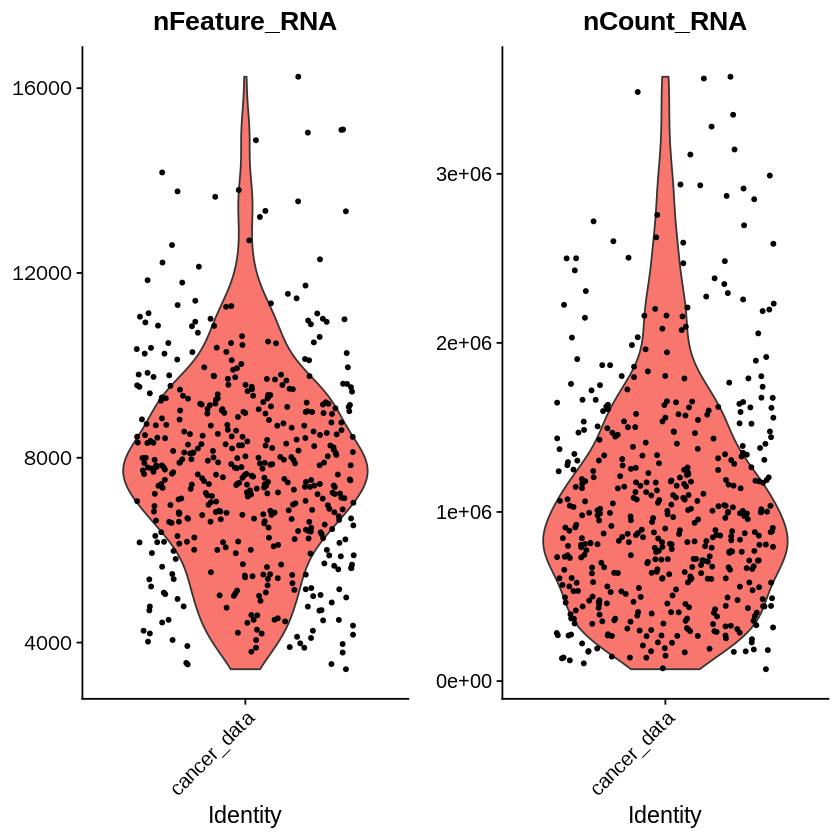

In [14]:
VlnPlot(gene_seurat, features = c("nFeature_RNA", "nCount_RNA"))

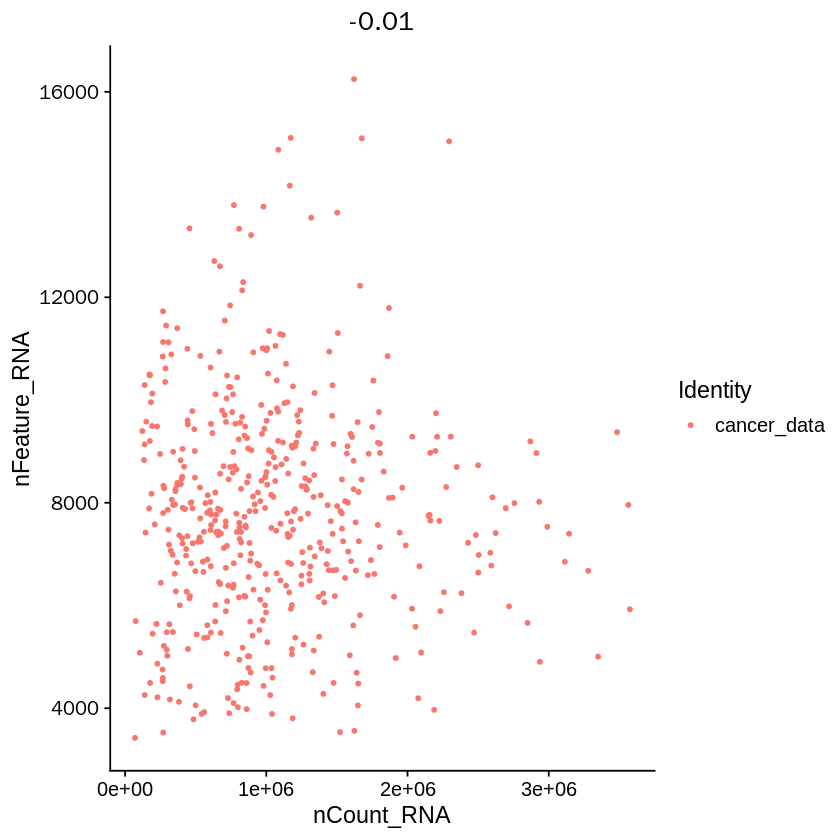

In [15]:
FeatureScatter(gene_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [16]:
gene_seurat <- NormalizeData(gene_seurat, normalization.method = "LogNormalize", scale.factor = 10000)

In [17]:
gene_seurat

An object of class Seurat 
25487 features across 489 samples within 1 assay 
Active assay: RNA (25487 features)

In [50]:
gene_seurat <- FindVariableFeatures(gene_seurat, selection.method = "vst", nfeatures = 1000)

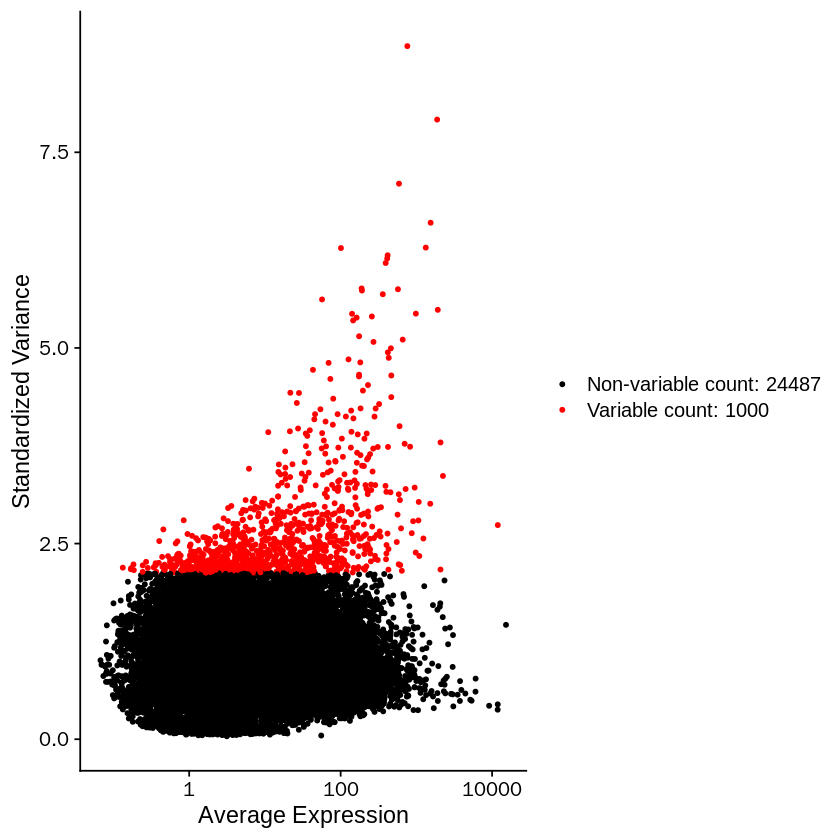

In [51]:
VariableFeaturePlot(gene_seurat)

In [28]:
variable_genes <- VariableFeatures(gene_seurat)

In [40]:
variable_genes.df <- do.call("rbind", lapply(variable_genes, as.data.frame)) 

In [44]:
colnames(variable_genes.df) <- 'variable_genes'

In [46]:
dim(variable_genes.df)

[1] 1500    1

In [49]:
write.csv(variable_genes.df,'/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_variable_genes.csv',
         row.names = FALSE)